# **3. 해당 데이터에서 Outcome을 삭제하고 Length를 예측하는 회귀를 수행**

In [3]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_csv("C:/Users/Yujin/Desktop/3-2/Deep-learning-application/dataset/abalone.csv")

In [5]:
# 데이터프레임 출력
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
# Sex를 라벨인코딩해줌
print("Original value counts:")
print(df['Sex'].value_counts())

Original value counts:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [7]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [8]:
# M: 2, I: 1, F: 0
print("\nLabel encoded data:")
print(df)


Label encoded data:
        id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0    2   0.455     0.365   0.095        0.5140          0.2245   
1        1    2   0.350     0.265   0.090        0.2255          0.0995   
2        2    0   0.530     0.420   0.135        0.6770          0.2565   
3        3    2   0.440     0.365   0.125        0.5160          0.2155   
4        4    1   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ...     ...       ...     ...           ...             ...   
4172  4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176  4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500

In [15]:
print("Value counts after label encoding:")
print(df['Sex'].value_counts())

Value counts after label encoding:
Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64


In [17]:
# "https://github.com/prudhvinathreddymalla/Abalone-Dataset/blob/master/Abalone.ipynb"를 참고해서
# Rings에 1.5를 더하면 age가 된다는 사실을 알고 이를 사용함

df['age'] = df.Rings + 1.5
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [19]:
AgeValues = df['age'].values
AgeIndex = []

for age in AgeValues:
    if age < 8:
        AgeIndex.append('0')  # 젊은 경우
    else:
        AgeIndex.append('1')  # 늙은 경우

AgeIndex = pd.DataFrame(data=AgeIndex, columns=['AgeIndex'])
df['AgeIndex'] = AgeIndex['AgeIndex']

print(df.head())

   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings   age AgeIndex  
0          0.1010         0.150     15  16.5        1  
1          0.0485         0.070      7   8.5        1  
2          0.1415         0.210      9  10.5        1  
3          0.1140         0.155     10  11.5        1  
4          0.0395         0.055      7   8.5        1  


In [21]:
df = df.drop('id',axis=1)

In [26]:
df = df.drop('Rings',axis=1)

In [28]:
df = df.drop('age',axis=1)

In [30]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


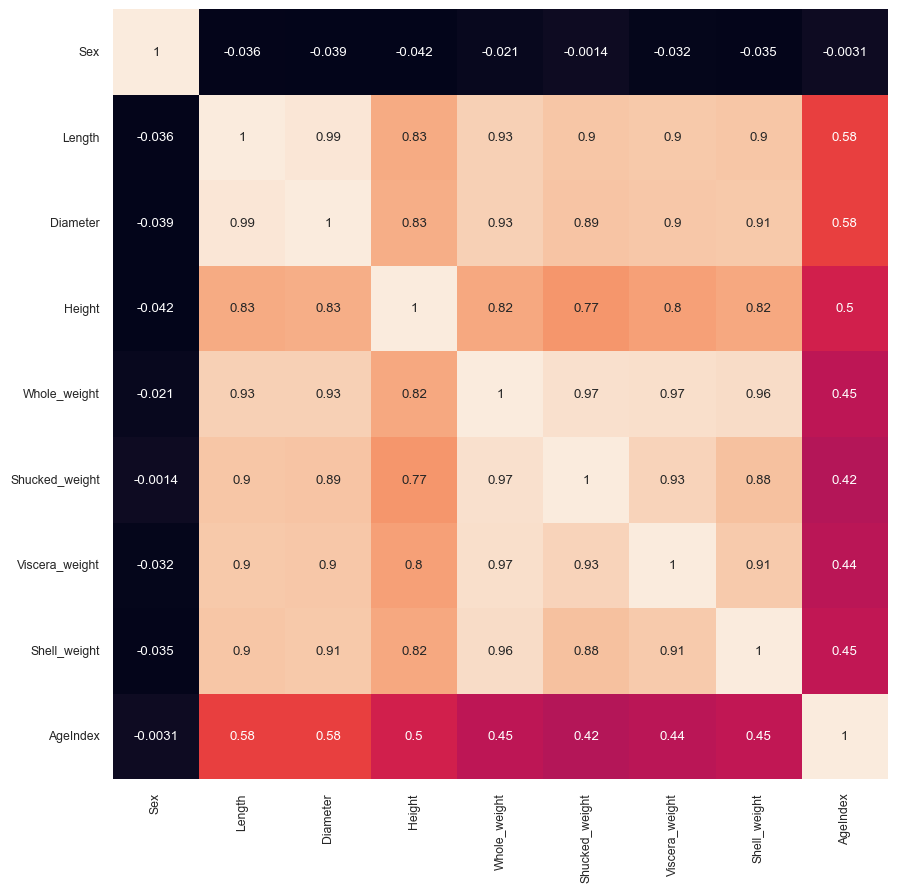

In [32]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# AgeIndex 열을 제거, head() 메서드를 사용해 처음 5행을 출력
X=df.drop('AgeIndex',axis=1)
X.head() 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [40]:
y = df['AgeIndex']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: AgeIndex, dtype: object

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


## **1. LR**

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print('평균제곱근오차 sol1')
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

# print('\n평균제곱근오차 sol2')
# def mse_np(actual, predicted):
#     return np.mean((np.array(actual) - np.array(predicted)) ** 2)

# print('평균제곱근오차', mse_np(ly_preds, y_test))

# print('\n평균제곱근오차 sol3')
# def mse(actual, predicted):
#     sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
#     mean_square_error = sum_square_error / len(actual)
#     return mean_square_error

# print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 sol1
평균제곱근오차 0.05372328817449412


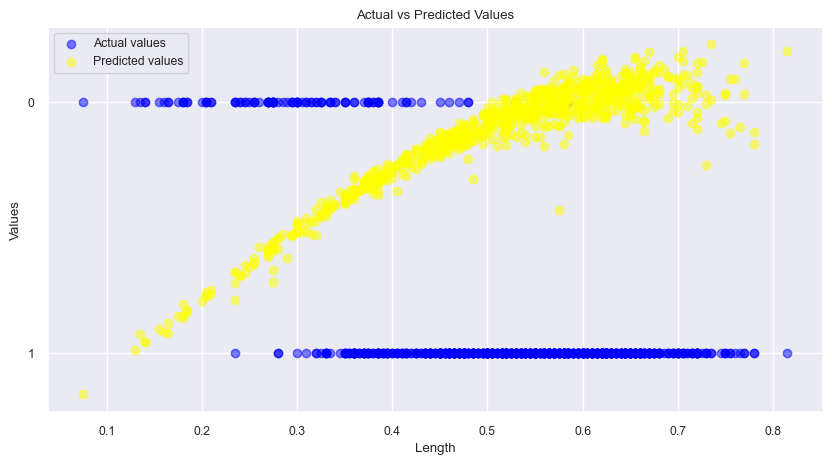

In [52]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Length'], y_test, label='Actual values', c='blue', alpha=0.5)
plt.scatter(X_test['Length'], ly_preds, c='yellow', label='Predicted values', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **2. DT**

In [56]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.09210526315789473


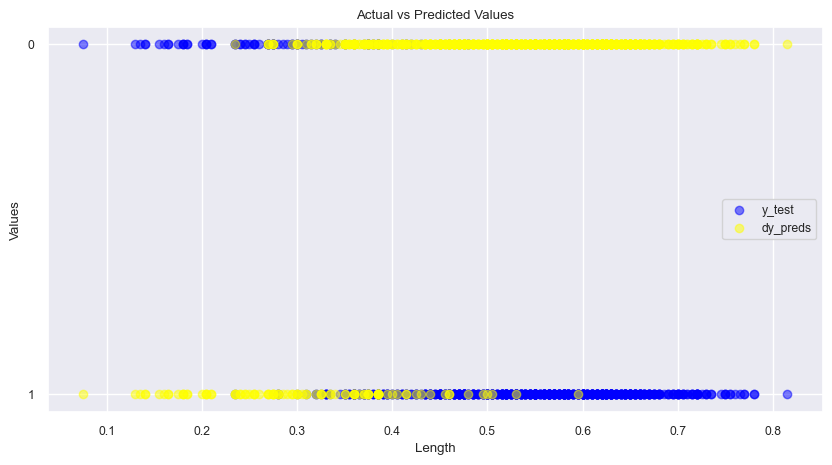

In [58]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Length'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['Length'], dy_preds, c='yellow', label='dy_preds', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **3. RF**

In [60]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.050637320574162675


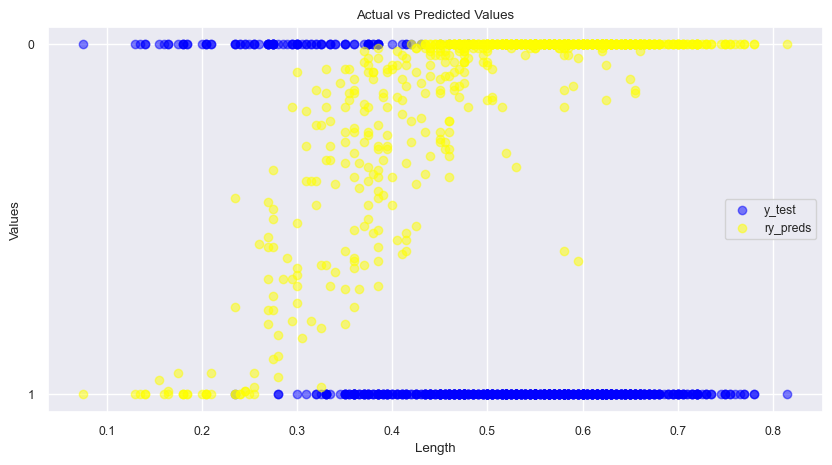

In [62]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Length'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['Length'], ry_preds, c='yellow', label='ry_preds', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **4. SVR**

In [64]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.06809133513633647


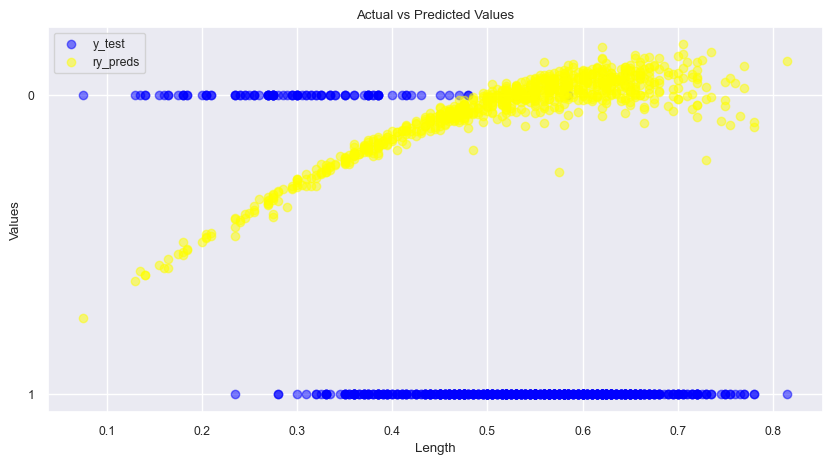

In [66]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Length'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['Length'], ry_preds, c='yellow', label='ry_preds', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()